In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import concurrent.futures
import time
import duckdb 
conn = duckdb.connect('analysis.db') # create an in-memory database

In [2]:
conn.sql("SHOW ALL TABLES")

┌──────────┬─────────┬──────────────────────┬──────────────────────┬─────────────────────────────┬───────────┐
│ database │ schema  │         name         │     column_names     │        column_types         │ temporary │
│ varchar  │ varchar │       varchar        │      varchar[]       │          varchar[]          │  boolean  │
├──────────┼─────────┼──────────────────────┼──────────────────────┼─────────────────────────────┼───────────┤
│ analysis │ main    │ A10_1_1_MAP_20240320 │ [AD, AD_BC, RPTR_BC] │ [VARCHAR, VARCHAR, VARCHAR] │ false     │
│ analysis │ main    │ A10_1_2_MAP_20240320 │ [AD, AD_BC, RPTR_BC] │ [VARCHAR, VARCHAR, VARCHAR] │ false     │
│ analysis │ main    │ A10_1_ADBC           │ [index, AD BCs]      │ [VARCHAR, BIGINT]           │ false     │
│ analysis │ main    │ A10_1_AD_FIL         │ [index, AD BCs]      │ [VARCHAR, BIGINT]           │ false     │
│ analysis │ main    │ A10_1_RPTR           │ [index, RPTR BCs]    │ [VARCHAR, BIGINT]           │ false     │
│

In [5]:
rptr_tile = conn.sql("""SELECT COUNT(AD), RPTR_BC 
FROM A10_2_MAP_20240320 
GROUP BY RPTR_BC""").df()

rptr_tile

,count(AD),RPTR_BC
0,2,TAGATAGTCTGATA
1,3,TCGGTACTGACTGG
2,3,AAGGTACTTGATTG
3,1,GTTGCCATACACTA
4,4,GTTCGTGGATTACA
...,...,...
588767,1,TTTAGCACGCATGA
588768,1,AATCTTCGCATCAT
588769,1,AATTCTTATATAGC
588770,1,TATCCCTACAAATC


<Axes: xlabel='count(AD)', ylabel='Count'>

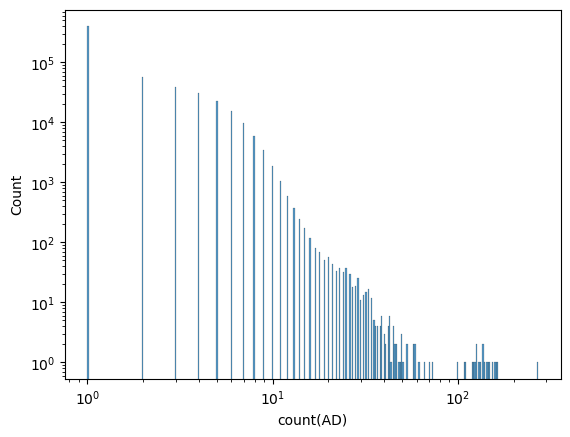

In [8]:
sns.histplot(rptr_tile, x='count(AD)', log_scale=(True, True))

In [14]:
rptr_tile[rptr_tile['count(AD)'] != 1].sum()

/tmp/ipykernel_18261/1554487946.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  rptr_tile[rptr_tile['count(AD)'] != 1].sum()


count(AD)    778806
dtype: int64

In [10]:
rptr_tile_m1 = conn.sql("""SELECT COUNT(AD), RPTR_BC 
FROM A10_1_2_MAP_20240320 
GROUP BY RPTR_BC""").df()

rptr_tile_m1

,count(AD),RPTR_BC
0,2,AAGGAGCGGTCCGT
1,1,TAAATAAATCCGCA
2,1,AGTACGTCCTCTCG
3,1,CCGTGATTAAATGA
4,1,AAAGAAAGTAATTA
...,...,...
284818,1,AAGCCATGTTCCAC
284819,1,CATTCCGTCGACAG
284820,1,GAGCTAGGTGACAT
284821,2,TCACCCAAGTGCGG


<Axes: xlabel='count(AD)', ylabel='Count'>

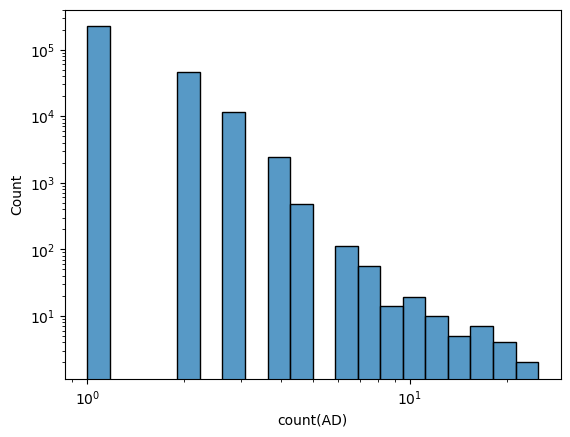

In [11]:
sns.histplot(rptr_tile_m1, x='count(AD)', log_scale=(True, True))

In [13]:
rptr_tile_m1[rptr_tile_m1['count(AD)'] != 1].sum()

/tmp/ipykernel_18261/1938551348.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  rptr_tile_m1[rptr_tile_m1['count(AD)'] != 1].sum()


count(AD)    140621
dtype: int64

In [15]:
rptr_tile_m1_1 = conn.sql("""SELECT COUNT(AD), RPTR_BC 
FROM A10_1_1_MAP_20240320 
GROUP BY RPTR_BC""").df()

rptr_tile_m1_1

,count(AD),RPTR_BC
0,2,CAGGTGTATAGAGA
1,1,ATAAAACCTATGTG
2,1,GCGAAGTAATGTCT
3,3,CCTTTTCTAGAAAG
4,3,GCAATGAATGGCGT
...,...,...
437551,3,TTAAATGATTCCTC
437552,4,ATTGCTGTGGTTGT
437553,2,ATTCGACACCCGCC
437554,3,ATCTCCATCGTTGC


<Axes: xlabel='count(AD)', ylabel='Count'>

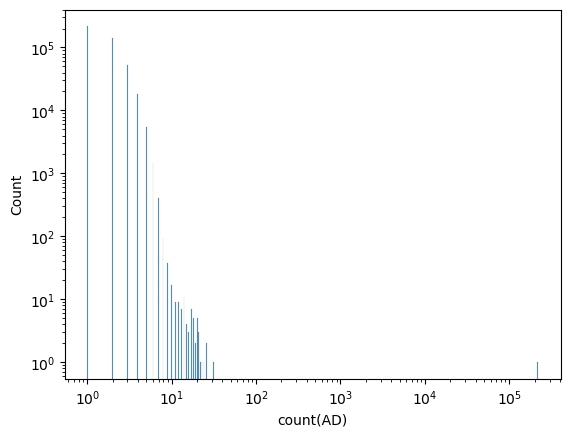

In [16]:
sns.histplot(rptr_tile_m1_1, x='count(AD)', log_scale=(True, True))

In [18]:
rptr_tile_m1_1[rptr_tile_m1_1['count(AD)'] != 1].sum()

/tmp/ipykernel_18261/2261431814.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  rptr_tile_m1_1[rptr_tile_m1_1['count(AD)'] != 1].sum()


count(AD)    776222
dtype: int64